# **CS2302 Data Structures**
**Assignment:** Lab X - Writing better lab reports

**Authors:** Jose G. Perez

**Last modified:** January 31, 2023


## Code Preparation and Provided Functions
Run the following cell to import all the required libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class BST:

    def __init__(self, key=None, left=None, right=None):
        # Constructor
        if (key==None): # if key is None, it will create an empty tree
            self.is_empty = True
        else:
            self.is_empty = False
            self.key=key
            if left==None:
                self.left=BST()
            else:
                self.left=left
            if right==None:
                self.right=BST()
            else:
                self.right=right

    def insert(self,newkey):
        if self.is_empty: # If tree is empty - create a one-node tree containing newkey
            self.is_empty = False
            self.key=newkey
            self.left=BST()
            self.right=BST()
        else:
            if self.key>newkey:  # Insert newkey in left subtree
                self.left.insert(newkey)
            else:                # Insert newkey in right subtree
                self.right.insert(newkey)

    def in_order(self):
        # In-order traversal. Prints keys in tree in ascending order
        if not self.is_empty:
            self.left.in_order()
            print(self.key,end=' ')
            self.right.in_order()


    def find(self,key,parent=None,return_parent=False):
        # Returns address of node where key is.
        # If return_parent is True, it also returns the parent of the node where key is
        # Returning the parent makes deletions simpler
        if self.is_empty:
            if return_parent:
                return parent, None
            return None
        if self.key == key:
            if return_parent:
                return parent, self
            return self
        if self.key>key:
            return self.left.find(key,self,return_parent)
        return self.right.find(key,self,return_parent)

    def delete(self,key):
        parent, node = self.find(key,None,True)
        if node==None:
            print('key to delete was not found in tree!')
            return
        children = [t for t in [node.left,node.right] if not t.is_empty]
        if len(children)==0: # Case 1, just delete the leaf
            if parent == None: # If the leaf to delete is also the root, the tree becomes empty
                self.is_empty = True
            elif parent.left == node:  parent.left = BST()
            else:  parent.right = BST()
        elif len(children)==1: # Case 2, make parent point to node's only child
            if parent == None: # If the node to delete the root, it's only child becomes the new root
                t = children[0]
                self.key = t.key
                self.left = t.left
                self.right = t.right
            elif parent.left == node:  parent.left = children[0]
            else:  parent.right = children[0]
        else: # Case 3
            s = node.right
            while not s.left.is_empty: # Find smallest key in node's right subtree (key's successor)
                s = s.left
            temp = s.key
            node.delete(s.key)  # Delete the node containing the key's successor
            node.key = temp     # Copy the succesor to the current node

    ######## Functions to draw BSTs to the screen
    def draw(self,title=''):
        if self.is_empty:
            print('Empty tree, nothing to draw')
        else:
            dx ={}
            self.set_xy(dx)
            fig, ax = plt.subplots()
            self.draw_(ax, dx)
            ax.axis('off')
            fig.suptitle(title, fontsize=14)
            plt.show()

    def draw_(self, ax, dx):
        # Auxiliary function used by the drawing function
        if not self.is_empty:
            px, py = dx[self]
            for child in [self.left, self.right]:
                if not child.is_empty:
                    cx,cy = dx[child]
                    ax.plot([px,cx],[py,cy],linewidth=1,color='k')
                    child.draw_(ax,dx)
            ax.text(px,py, str(self.key), size=12,ha="center", va="center",bbox=dict(facecolor='w',boxstyle="circle"))

    def set_xy(self,dx,x=0,y=0):
        # Auxiliary function used by the drawing function, is find the image coordinates to draw the tree's nodes
        if not self.is_empty:
            next_x = self.left.set_xy(dx,x,y-1)
            dx[self] = (next_x,y)
            x = self.right.set_xy(dx,next_x+1,y-1)
        return x

    def print_tree(self,space=''):
        # Prints tree with structure, rotated 90 degrees
        # root is at leftmost position
        # maximum key is on the first line
        # miniimum key is on the last line
        if not self.is_empty:
            self.right.print_tree(space+'   ')
            print(space,self.key)
            self.left.print_tree(space+'   ')

def random_tree(n,seed=None):
  if seed!=None:
    np.random.seed(seed)
  A = np.random.permutation(n)
  T = BST()
  for a in A:
    T.insert(a)
  return T

def random_choice_tree(min_val,max_val,n,seed=None):
  if seed!=None:
    np.random.seed(seed)
  A = np.arange(min_val,max_val)
  np.random.shuffle(A)
  T = BST()
  for a in A[:n]:
    T.insert(a)
  return T

# Introduction
In this lab, I will demonstrate an example of how to write a lab report.

If you look at the syllabus, you will notice that a report must contain the following:

1. An introduction
2. Proposed solution design and implementation
3. Experimental results
4. Conclusions
5. Appendix
6. Signed academic honesty certification

Not only must your report contain all of these, but you must also make sure to cover each in enough depth and detail as described in the syllabus. In the next section I will talk a little bit about each component of the report.

## Report Elements
1. Introduction
* Write an introduction describing what the purpose of the lab is.
* For each problem, write a brief description explaining the problem.
* **PLEASE REMOVE ALL THE EXTRA EXPLANATIONS AND HINTS GIVEN IN THE STARTER CODE. THOSE ARE FOR YOUR UNDERSTANDING AND NOT PART OF YOUR FINAL REPORT.**

2. Proposed solution design and implementation
* Remember the syllabus says: **"Provide an informal, high-level description".**
* Don't describe code line by line but instead by higher-level ideas and vocabulary. We can read the code, we want to know your thought process.
* If you gave your description to another student they should be able to infer the missing details and write the solution without seeing your code at all. 
* If you had to write extra helper functions this is the place to mention them as well.
* Consider using bullet points to describe your solution. For some students, it's easier to write bullet points. For others, writing a few sentences is easier. 
* Try not to write too much, most solutions can be explained with a few bullet points and/or sentences. 

3. Experimental results
* Describe how you tested your functions to make sure they work.
* Describe the experiments you did and the output they produced.
* **Showing results** is better than describing them. If you are using BSTs or BTrees, **draw them**.
* If your solution **doesn't work for all test cases**, include that as well.
* I recommend writing all the running times next to each function and also in one place at the end of the report in table format.

4. Conclusion

This section should also be self-explanatory. Talk about what you learned while you were solving the lab and what you struggled with.

5. Appendix

The code is already inside the notebook when using Colab so you don't need to worry about this section. **DON'T DUPLICATE YOUR COLAB CODE!**

## Formatting
* Remember that Colab allows for bold, italics, bullet points, and so much more! Use that to your advantage. You can even use tables through Markdown syntax as shown here https://www.markdownguide.org/extended-syntax/. 
* **You can also upload images into Colab!**
* If you prefer making tables and graphs in Excel just screenshot them and upload them to Colab. There's an image attachment button in the toolbar when writing text cells.

## Meshing Text and Code Together
We will not give you a template to follow, but instead explain the main idea behind using Colab notenooks:
> **You want to weave the report elements as text cells in between code cells. In this way, you create an easily readable report.**

For example:
* Include the proposed solution design before the code for that specific problem and the experimental results right after. 

By meshing text and code together in a sequential easy-to-read fashion, you fulfill the syllabus requirements while utilizing the power of Jupyter notebooks. Unlimited power!


# Small Example
Below I provide a small **INCOMPLETE** example for demonstration purposes. You don't have to follow it exactly, you just have to adhere to the idea of **meshing text and code cells together** and **include all elements included in the syllabus**.

## Problem 1 - Smallest
Write the function **smallest(T)** that receives a reference to a binary search tree named $T$ and returns the smallest item in the
tree. If the tree is empty, your function should return math.inf.

### Proposed Solution Design and Implementation
Here you would write your explanation in whatever way you prefer. I recommend bullet points as they are easier to write but feel free to write in sentences if preferred.

Just remember to write in **high-level language** and not describing the code line by line. We can read the code, we want you to explain your thought process.

In [ ]:
import math

def smallest(T):
  if T.is_empty:
    return math.inf
  if T.left.is_empty:
    return T.key
  return smallest(T.left) 

### Experimental Results
The running time of the function is 
> $O(log\ n)$

I tested the correctness of this function by running the following test cases:

* T1 = Empty BST
* T2 = Tree with One Node
* T3 = Tree with One Node + Left Child
* T4 = Tree with One Node + Both Children
* T5 = Balaced Tree with 5 Nodes
* T6 = Random Tree with 12 Nodes

The results in the following code cell demonstrate that the function correctly returns the smallest key in the BST for many different types of trees with different node counts.

**HERE YOU WOULD ALSO WRITE WHAT TEST CASES THE SOLUTION FAILS TO PASS, FOR EXAMPLE:**
> The results also demonstrate that the function doesn't work for trees that are .....

Empty tree, nothing to draw
Smallest = inf


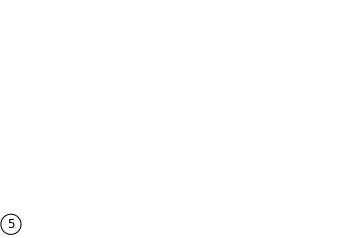

Smallest = 5


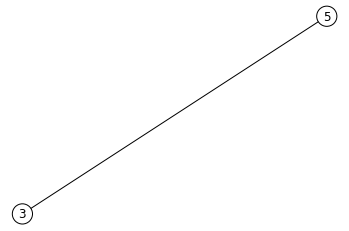

Smallest = 3


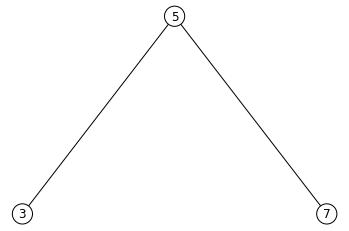

Smallest = 3


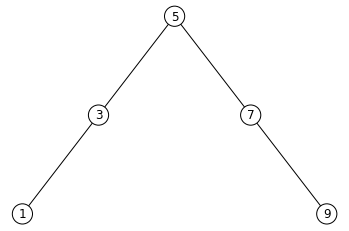

Smallest = 1


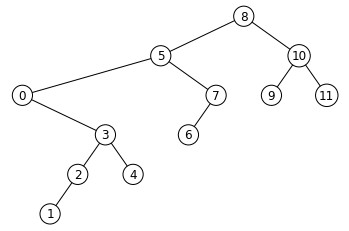

Smallest = 0


In [ ]:
T1 = BST()

T2 = BST()
T2.insert(5)

T3 = BST()
T3.insert(5)
T3.insert(3)

T4 = BST()
T4.insert(5)
T4.insert(3)
T4.insert(7)

T5 = BST()
T5.insert(5)
T5.insert(3)
T5.insert(7)
T5.insert(1)
T5.insert(9)

T6 = random_tree(n=12)

for T in [T1, T2, T3, T4, T5, T6]:
  T.draw()
  print('Smallest =', smallest(T))

## Running Time Analysis
Below are the running times for my solutions that do not use recursion.

| Problem | Running Time |
| --- | --- |
| 1. Even Numbers | O(1) |
| 2. Odd Numbers | O(1) |
| 3. Loop | O(n) |
| 4. QuickSort | O(n log n) |

Below are the running times for my solutions that use recursion,

| Problem | Recurrence Equation |  Running Time |
| --- | --- | --- |
| 5. BST Find | T(n) = T(n/2) + 1 | O(log n) |
| 6. BST In_Order | T(n) = 2T(n/2) + 1 | O(n) |

If you prefer, you can also just write the running time for each function in their respective result sections.

## Conclusions
In this lab I learned that writing recursive functions is much easier than I had initially expected. I had a hard time figuring out the running times of the recursive functions but after asking one of the IAs I was able to understand how to solve the recurrence equations using the Master Theorem. I kept getting IndexError when solving the list problems because I was not checking if they were empty. I couldn't figure out how to solve the 3D array problems with images because I didn't know how to slice them correctly. Overall, I feel like this lab helped me understand the basics of Python better.